## Mood classfication using CNN (HAPPY / SAD)
Mood classification using Convolutional Neural Networks (CNN) is a machine learning technique that aims to predict the emotional state of a person based on input data, such as images or audio signals. In this case, the goal is to classify whether a person is feeling "happy" or "sad" based on visual cues.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#image data generator is the package to lable the images & it will automatically lable all the images

In [4]:
#image.load_img() is a function from the Keras library that is used to load an image file into a PIL (Python Imaging Library) image object.
img = image.load_img(r'C:\Users\LENOVO T480\Desktop\Training\happy\aa082d0cf7c60a28026e9c8b15d20d2b.jpg')

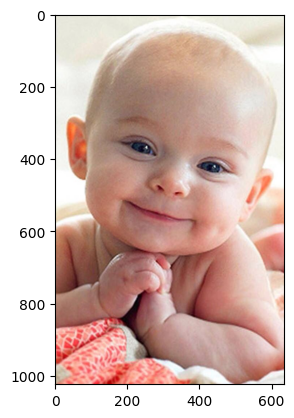

In [5]:
#The imshow() function displays the image in a new window or as a subplot in a figure.
plt.imshow(img)

In [6]:
#cv2.imread() is a function from the OpenCV library that is used to read an image file into a NumPy array.
# 3 dimension metrics are created for the image
# the value ranges from 0-255
i1 = cv2.imread(r'C:\Users\LENOVO T480\Desktop\Training\happy\aa082d0cf7c60a28026e9c8b15d20d2b.jpg')
i1

array([[[224, 236, 236],
        [224, 236, 236],
        [224, 236, 236],
        ...,
        [235, 239, 240],
        [235, 239, 240],
        [235, 239, 240]],

       [[224, 236, 236],
        [224, 236, 236],
        [224, 236, 236],
        ...,
        [235, 239, 240],
        [235, 239, 240],
        [235, 239, 240]],

       [[224, 236, 236],
        [224, 236, 236],
        [223, 235, 235],
        ...,
        [235, 239, 240],
        [235, 239, 240],
        [235, 239, 240]],

       ...,

       [[142, 169, 190],
        [141, 168, 189],
        [141, 166, 192],
        ...,
        [229, 231, 232],
        [226, 228, 229],
        [226, 228, 229]],

       [[145, 171, 195],
        [142, 168, 192],
        [135, 162, 189],
        ...,
        [229, 231, 232],
        [225, 227, 228],
        [225, 227, 228]],

       [[145, 171, 195],
        [141, 166, 192],
        [132, 159, 186],
        ...,
        [230, 232, 233],
        [227, 229, 230],
        [227, 229, 230]]

In [7]:
# shape of your image height, width, rgb
i1.shape

(1024, 634, 3)

In [8]:
# to scale all the images i need to divide with 255
# we need to resize the image using 200, 200 pixel
train = ImageDataGenerator(rescale = 1/255)
validataion = ImageDataGenerator(rescale = 1/255)

In [9]:
train_dataset = train.flow_from_directory(r'C:\Users\LENOVO T480\Desktop\Training',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')
validataion_dataset = validataion.flow_from_directory(r'C:\Users\LENOVO T480\Desktop\Validation',
                                          target_size = (200,200),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 7 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [10]:
train_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [11]:
train_dataset.classes

array([0, 0, 0, 0, 1, 1, 1])

In [12]:
# now we are applying Max Pooling
# Max pooling is a common operation in convolutional neural networks (CNNs) used for image processing and computer vision tasks.
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2), #3 filtr we applied hear
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),    
                                    #                       
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(1,activation= 'sigmoid')
                                    ]
                                    )

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['accuracy']
              )

C:\Users\LENOVO T480\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs = 10,
                     validation_data = validataion_dataset)

Epoch 1/10
3/3 [==============================] - 2s 213ms/step - loss: 2.5826 - accuracy: 0.2857
Epoch 2/10
3/3 [==============================] - 1s 215ms/step - loss: 0.6759 - accuracy: 0.5714
Epoch 3/10
3/3 [==============================] - 1s 204ms/step - loss: 0.1459 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 198ms/step - loss: 2.0232 - accuracy: 0.7143
Epoch 5/10
3/3 [==============================] - 1s 198ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 1s 208ms/step - loss: 0.0123 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 1s 215ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 1s 202ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 1s 200ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
3/3 [==============================] - 1s 237ms/step - loss: 8.7843e-04 - accuracy: 1.0000


In [15]:
dir_path = r'C:\Users\LENOVO T480\Desktop\Testing'
for i in os.listdir(dir_path ):
    print(i)
    #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
   # plt.imshow(img)
   # plt.show()

1000_F_205695578_2fg2t9Ry8H8qSC5B7Bm6HzrKMN7BF4w8.jpg
368a2a55887be8795c17a2fac55e65b4--happy-faces-a-smile.jpg
aa082d0cf7c60a28026e9c8b15d20d2b.jpg
boy-outdoor-portrait-cute-little-half-year-old-31210824.jpg
Happy face.jpg
Happy img.jpg
images (1).jfif
images.jfif
istockphoto-1399611762-170667a.jpg
photo-1624272949900-9ae4c56397e8.jfif


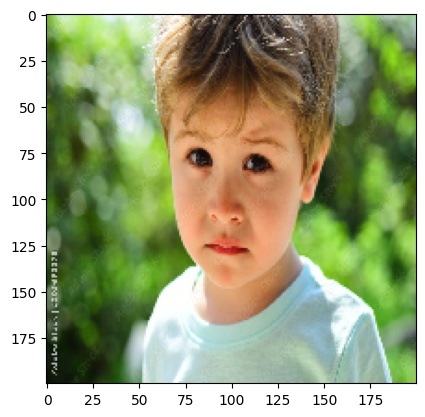

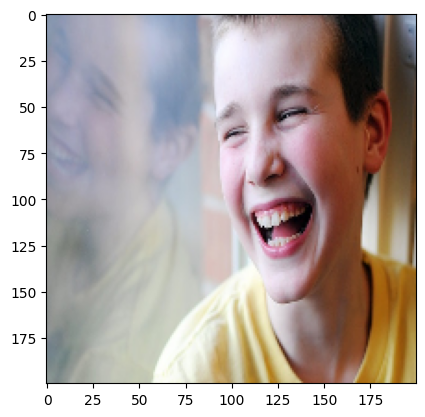

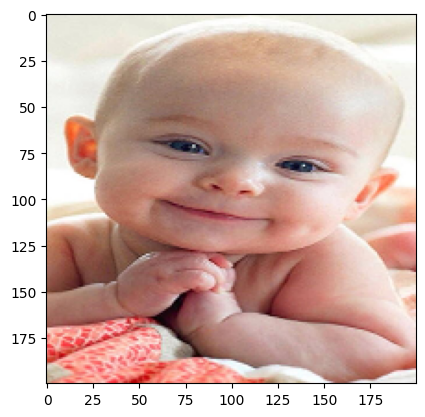

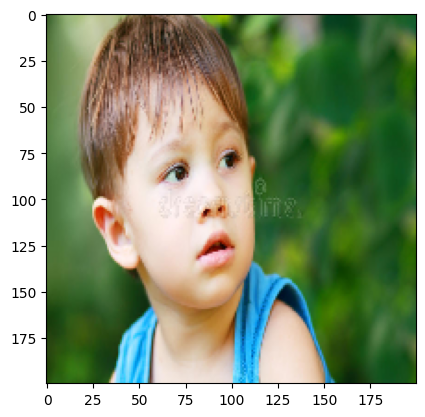

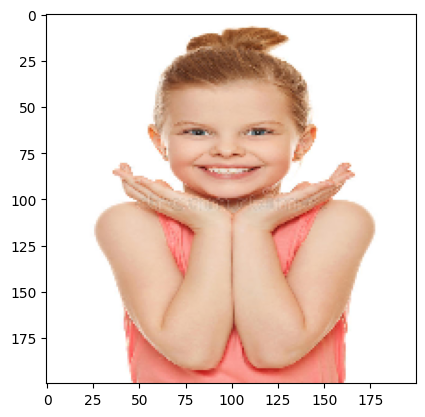

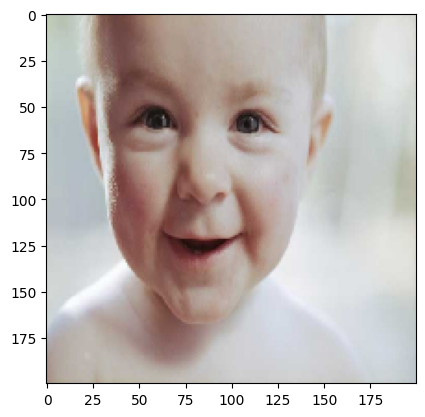

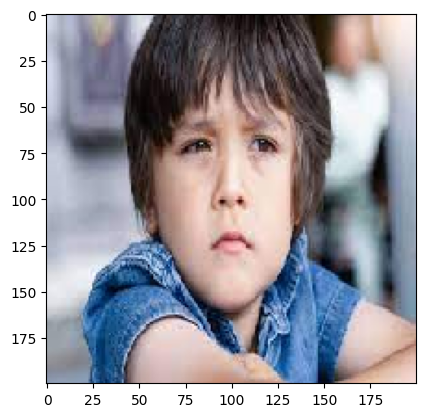

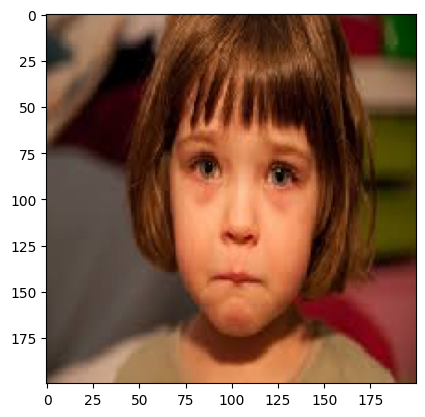

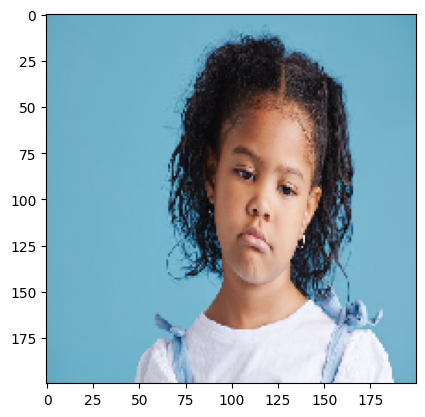

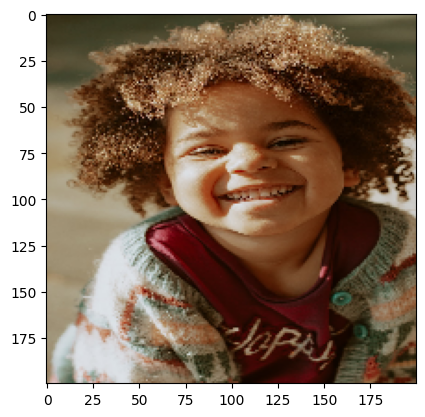

In [16]:
dir_path = r'C:\Users\LENOVO T480\Desktop\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()

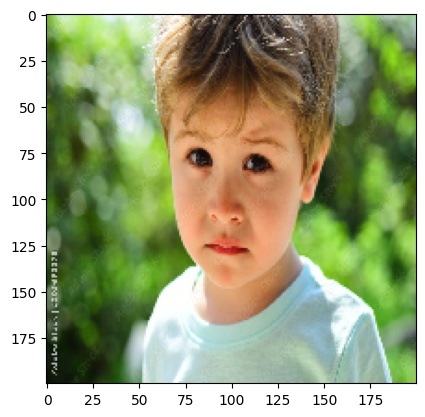

1/1 [==============================] - 0s 241ms/step
i am not happy


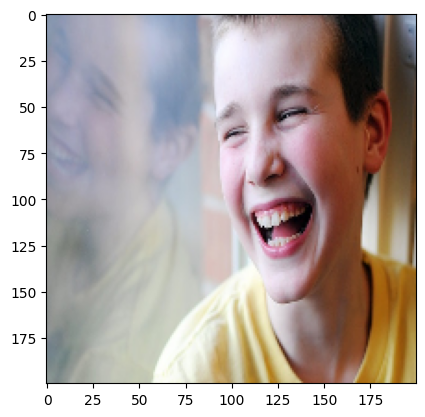

1/1 [==============================] - 0s 31ms/step
 i am happy


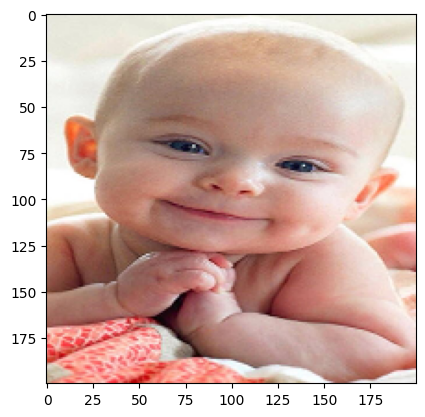

1/1 [==============================] - 0s 40ms/step
 i am happy


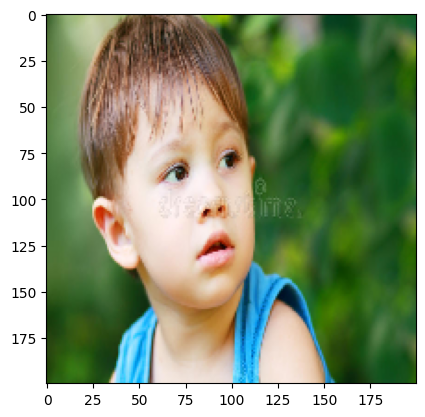

1/1 [==============================] - 0s 46ms/step
i am not happy


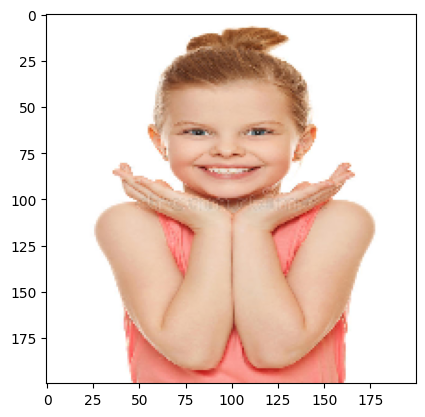

1/1 [==============================] - 0s 43ms/step
 i am happy


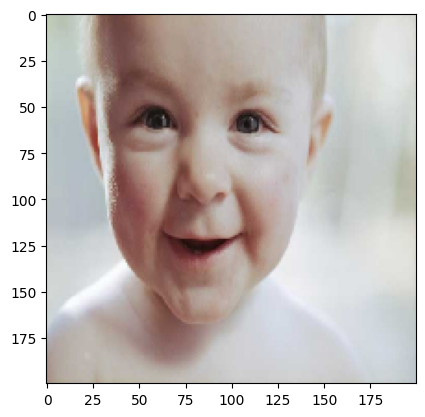

1/1 [==============================] - 0s 48ms/step
 i am happy


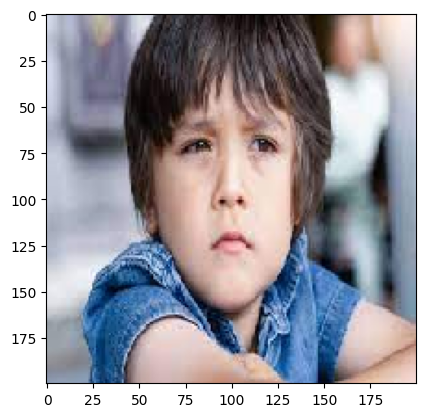

1/1 [==============================] - 0s 42ms/step
i am not happy


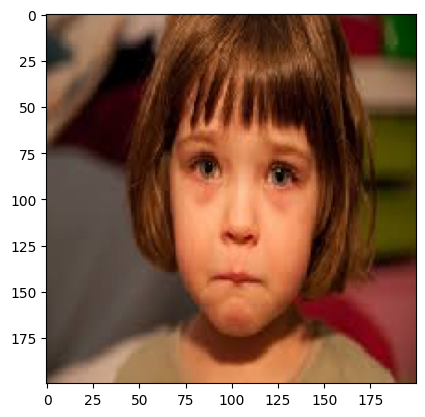

1/1 [==============================] - 0s 36ms/step
 i am happy


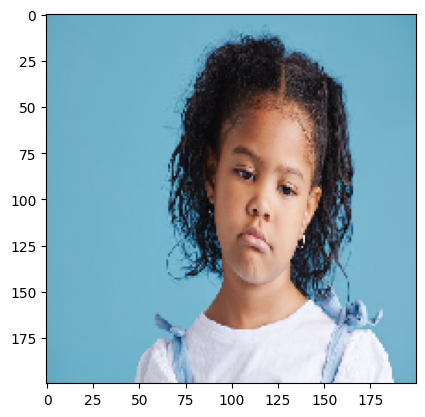

1/1 [==============================] - 0s 34ms/step
i am not happy


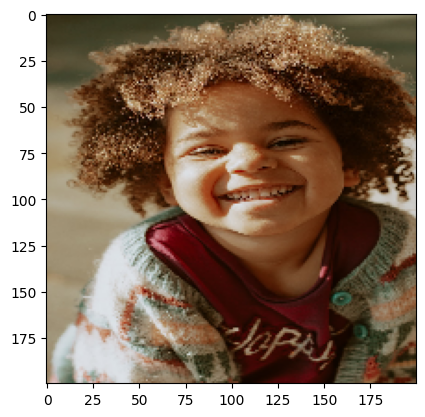

1/1 [==============================] - 0s 41ms/step
 i am happy


In [17]:
dir_path = r'C:\Users\LENOVO T480\Desktop\Testing'
for i in os.listdir(dir_path ):
    img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
    plt.imshow(img)
    plt.show()
        
    x= image.img_to_array(img)
    x=np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    
    val = model.predict(images)
    if val == 0:
        print( ' i am happy')
    else:
        print('i am not happy')